# test_d23b.ipynb
Test the functions contained in d23b.py, often using their default parameters.

Author: Benjamin S. Grandey, 2023–2024

In [1]:
import datetime
import d23b
import matplotlib.pyplot as plt
import pyvinecopulib as pv

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

## Watermark

In [3]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.2
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.5.0

conda environment: d23b-ice-dependence

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit


## Data

### AR6 samples

In [4]:
%%time
samples_da = d23b.read_ar6_samples()
samples_da

CPU times: user 114 ms, sys: 20 ms, total: 134 ms
Wall time: 194 ms


<xarray.DataArray 'sea_level_change' (samples: 20000)>
array([ 0.033,  0.056,  0.021, ..., -0.005, -0.018, -0.005])
Coordinates:
    years    int32 2100
  * samples  (samples) int64 0 1 2 3 4 5 ... 19994 19995 19996 19997 19998 19999
Attributes:
    units:    m

### Antarctic ISM ensembles

In [5]:
%%time
ism_df = d23b.read_ism_ensemble_data()
ism_df

CPU times: user 9.56 s, sys: 939 ms, total: 10.5 s
Wall time: 10.8 s


,EAIS,WAIS,Group,Notes,GrIS
0,-0.023720,-0.029648,P21,B1_AWI_PISM1,0.0
1,0.010322,0.022744,P21,B1_NCAR_CISM,0.0
2,-0.020039,0.007252,P21,B3_AWI_PISM1,0.0
3,0.027450,0.078800,P21,B3_NCAR_CISM,0.0
4,-0.043617,0.013104,P21,B4_AWI_PISM1,0.0
5,0.001055,0.034448,P21,B4_NCAR_CISM,0.0
6,-0.023385,-0.031954,P21,B5_AWI_PISM1,0.0
7,0.024530,0.047175,P21,B5_NCAR_CISM,0.0
8,-0.019902,-0.022967,P21,B6_AWI_PISM1,0.0
9,-0.017969,-0.015849,P21,B6_PIK_SICOPOLIS1,0.0


### FACTS data (gauge info, GRD)

In [6]:
%%time
gauge_info = d23b.read_gauge_info()
gauge_info

CPU times: user 24.9 ms, sys: 4.02 ms, total: 28.9 ms
Wall time: 28.7 ms


{'gauge_name': 'TANJONG_PAGAR', 'gauge_id': 1746, 'lat': 1.27, 'lon': 103.85}

In [7]:
%%time
gauge_grd = d23b.read_gauge_grd()
gauge_grd

CPU times: user 169 ms, sys: 23.9 ms, total: 193 ms
Wall time: 196 ms


{'gauge_name': 'TANJONG_PAGAR',
 'gauge_id': 1746,
 'lat': 1.27,
 'lon': 103.85,
 'lat_grd': 1.2280701398849487,
 'lon_grd': 103.85964965820312,
 'EAIS': 1.1081630364060402,
 'WAIS': 1.142452354542911,
 'GIS': 1.1161844013258815,
 'GrIS': 1.1161844013258815}

In [8]:
%%time
grd_df = d23b.get_grd_df()
grd_df.round(2)

CPU times: user 499 ms, sys: 63.7 ms, total: 563 ms
Wall time: 694 ms


,EAIS,WAIS,GrIS
REYKJAVIK,1.11,1.17,-1.70
DUBLIN,1.10,1.12,-0.04
TANJONG_PAGAR,1.11,1.14,1.12


## Methods

### Quantile function containing samples

In [9]:
%%time
qf_da = d23b.get_component_qf()
qf_da

CPU times: user 88.6 ms, sys: 11.9 ms, total: 100 ms
Wall time: 103 ms


<xarray.DataArray 'sea_level_change' (p: 20000)>
array([-0.114, -0.113, -0.113, ...,  0.221,  0.222,  0.222])
Coordinates:
    years    int32 2100
  * p        (p) float64 0.0 5e-05 0.0001 0.00015 ... 0.9998 0.9999 0.9999 1.0
Attributes:
    units:    m

### Modelling marginal distributions using fusion

CPU times: user 26.5 ms, sys: 3.36 ms, total: 29.8 ms
Wall time: 30 ms


<xarray.DataArray 'weights' (p: 20000)>
array([0.        , 0.00029413, 0.00058826, ..., 0.00058826, 0.00029413,
       0.        ])
Coordinates:
    years    int32 2100
  * p        (p) float64 0.0 5e-05 0.0001 0.00015 ... 0.9998 0.9999 0.9999 1.0
Attributes:
    units:    m

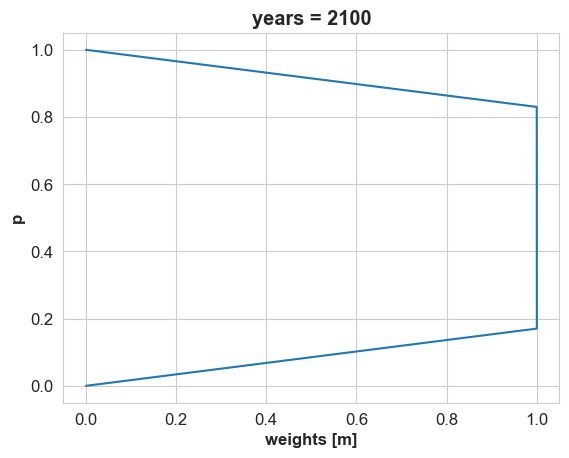

In [10]:
%%time
w_da = d23b.get_fusion_weights()
w_da.plot(y='p')
w_da

CPU times: user 211 ms, sys: 22.1 ms, total: 234 ms
Wall time: 236 ms


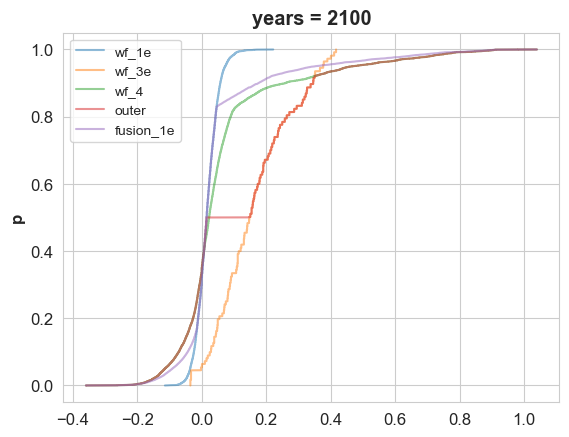

In [11]:
%%time
for workflow in ['wf_1e', 'wf_3e', 'wf_4', 'outer', 'fusion_1e']:
    qf_da = d23b.get_component_qf(workflow=workflow)
    qf_da.plot(y='p', label=workflow, alpha=0.5)
plt.legend()

### Quantifying dependence with bivariate copulas

In [12]:
%%time
bicop = d23b.quantify_bivariate_dependence()
bicop

read_ar6_samples(wf_1e, WAIS, ssp585, 2100): including PEN in WAIS
CPU times: user 331 ms, sys: 21.9 ms, total: 353 ms
Wall time: 445 ms


<pyvinecopulib.Bicop>
Gumbel 90°, parameters = 1.027

### Quantify trivariate dependence using a vine copula

In [13]:
%%time
for cop_workflow in ['wf_1e', 'wf_4', 'wf_3e', 'P21+L23', '1', '0', '10', '01',
                     (pv.BicopFamily.gaussian, 0.3), (pv.BicopFamily.clayton, 0.5), (pv.BicopFamily.joe, 0.7)]:
    tricop = d23b.quantify_trivariate_dependence(cop_workflow=cop_workflow)
    print(cop_workflow)
    print(tricop)
    print(tricop.taus)
    print('')

wf_1e
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Gumbel 90°, parameters = 1.027
2,3 <-> Clayton 180°, parameters = 0.0239618
** Tree: 1
1,3 | 2 <-> Clayton, parameters = 0.0345533

[[-0.0262897970306363, 0.011839061026383423], [0.01698323806175385]]
wf_4
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Joe, parameters = 1.96603
2,3 <-> Frank, parameters = 0.366098
** Tree: 1
1,3 | 2 <-> Clayton 270°, parameters = 0.0943228

[[0.3474489417743255, 0.040623106417807975], [-0.04503738260292951]]
wf_3e
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Frank, parameters = 22.0364
2,3 <-> Independence
** Tree: 1
1,3 | 2 <-> Independence

[[0.8320320015084047, 0.0], [0.0]]
P21+L23
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Joe, parameters = 3.26222
2,3 <-> Independence
** Tree: 1
1,3 | 2 <-> Independence

[[0.5475136442184771, 0.0], [0.0]]

1
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Gaussian, parameters = 1
2,3 <-> Gaussian, parameters = 1

[[1.0, 1.0]]

0
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Indep

### Sample a vine copula

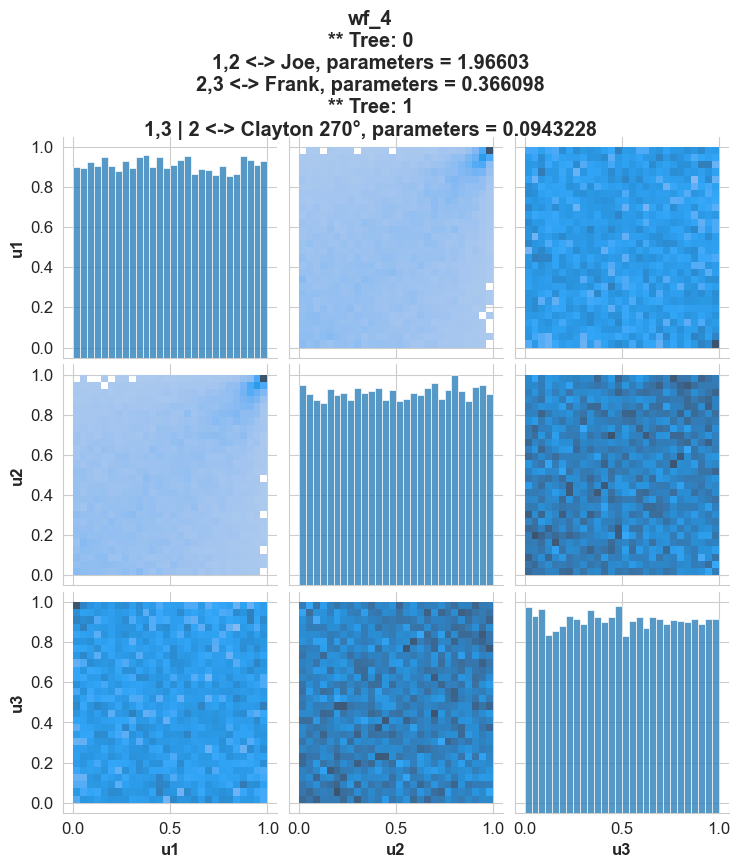

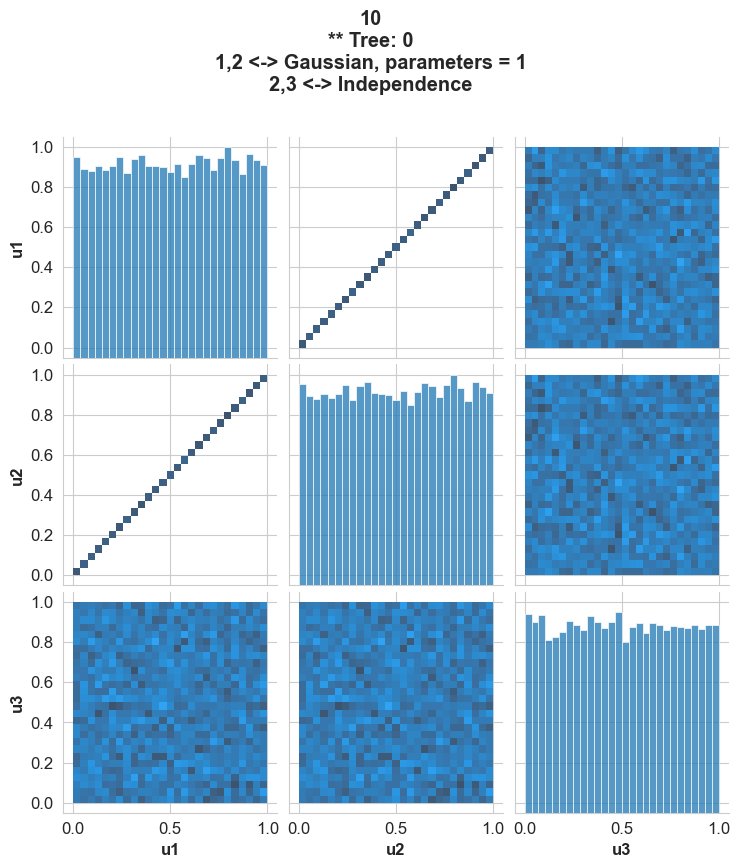

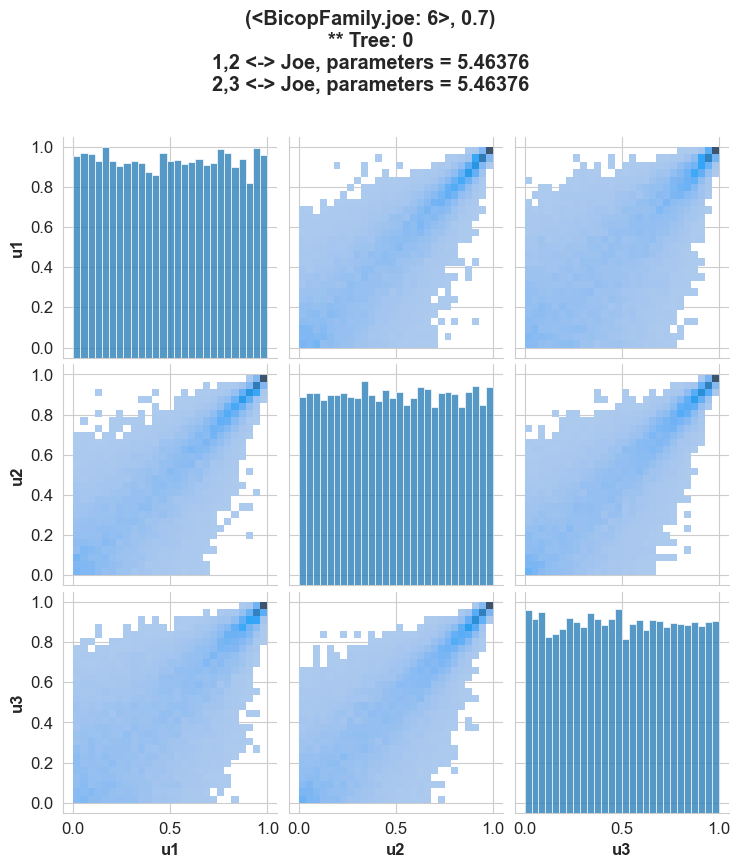

CPU times: user 2.95 s, sys: 42.3 ms, total: 2.99 s
Wall time: 3.01 s


In [14]:
%%time
for cop_workflow in ['wf_4', '10', (pv.BicopFamily.joe, 0.7)]:
    u_n3 = d23b.sample_trivariate_copula(cop_workflow=cop_workflow, plot=True)

### Sampling the total ice-sheet contribution

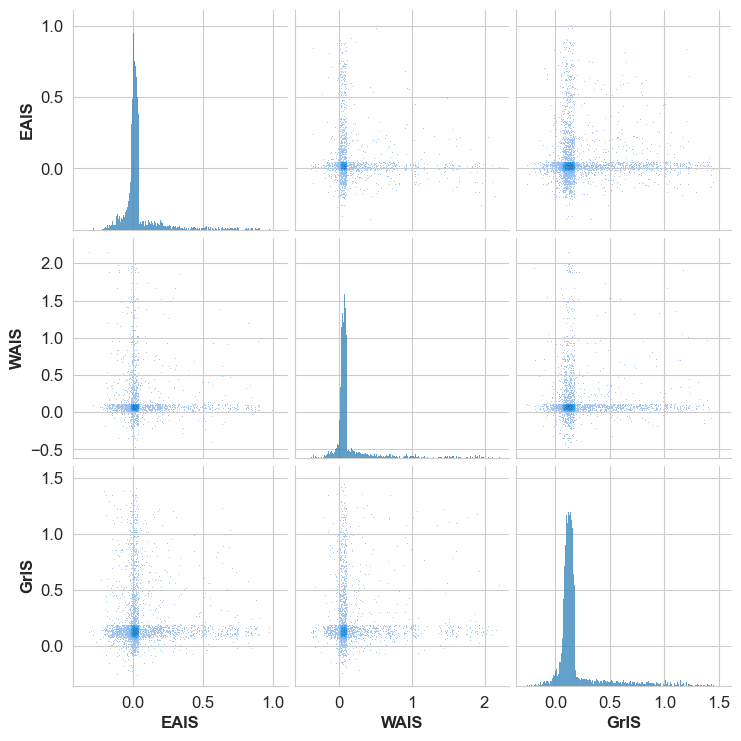

CPU times: user 1.97 s, sys: 33.4 ms, total: 2 s
Wall time: 2.01 s


,EAIS,WAIS,GrIS,TOT
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.047315,0.138249,0.194363,0.379927
std,0.150164,0.286652,0.231270,0.397392
min,-0.358962,-0.477087,-0.267994,-0.561525
25%,-0.006000,0.038000,0.097000,0.159670
50%,0.015000,0.068000,0.129000,0.230000
75%,0.037000,0.097000,0.165000,0.465573
max,1.039990,2.208497,1.521510,3.462728


In [15]:
%%time
trivariate_df = d23b.sample_trivariate_distribution(plot=True)
trivariate_df['TOT'] = trivariate_df.sum(axis=1)
trivariate_df.describe()

## Figures

CPU times: user 120 ms, sys: 5.1 ms, total: 125 ms
Wall time: 123 ms


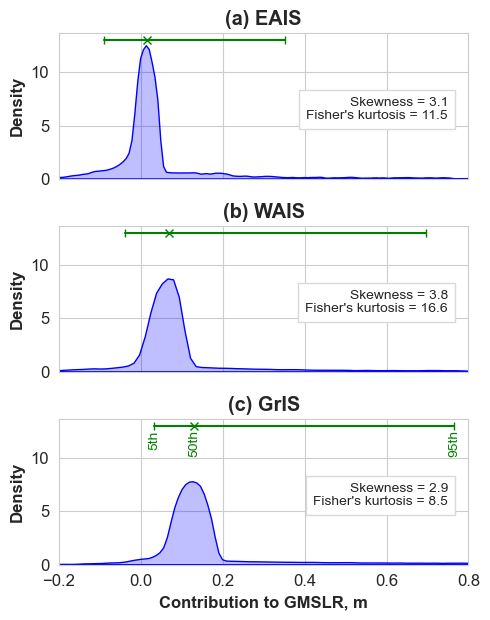

In [16]:
%%time
fig, axs = d23b.fig_component_marginals()

CPU times: user 10.6 s, sys: 1.2 s, total: 11.8 s
Wall time: 12.5 s


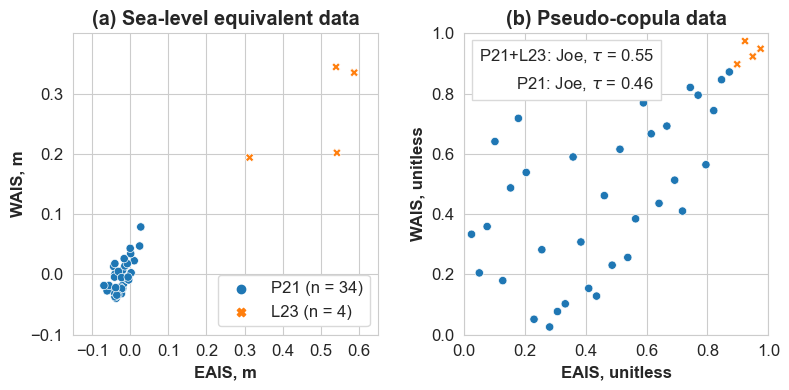

In [17]:
%%time
fig, axs = d23b.fig_ism_ensemble()

CPU times: user 15 s, sys: 182 ms, total: 15.2 s
Wall time: 16.2 s


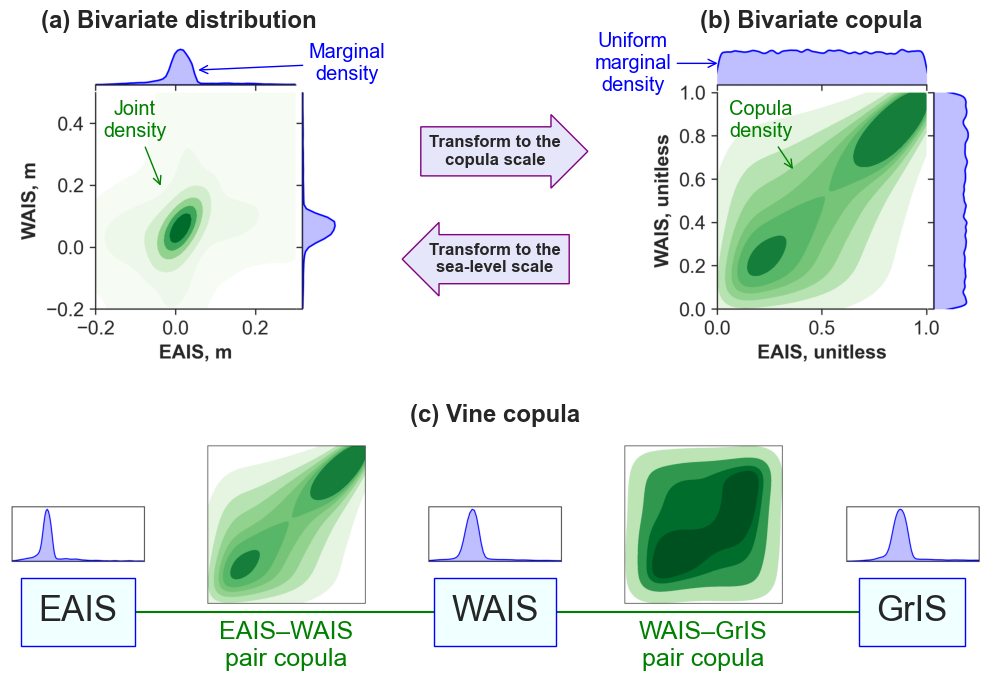

In [18]:
%%time
fig = d23b.fig_illustrate_copula()

Independence:
** Tree: 0
1,2 <-> Independence
2,3 <-> Independence
 [[0.0, 0.0]]

Perfect correlation:
** Tree: 0
1,2 <-> Gaussian, parameters = 1
2,3 <-> Gaussian, parameters = 1
 [[1.0, 1.0]]

Antarctic correlation:
** Tree: 0
1,2 <-> Gaussian, parameters = 1
2,3 <-> Independence
 [[1.0, 0.0]]
Workflow 1e corr.:
** Tree: 0
1,2 <-> Gumbel 90°, parameters = 1.027
2,3 <-> Clayton 180°, parameters = 0.0239618
** Tree: 1
1,3 | 2 <-> Clayton, parameters = 0.0345533
 [[-0.0262897970306363, 0.011839061026383423], [0.01698323806175385]]
Workflow 4 corr.:
** Tree: 0
1,2 <-> Joe, parameters = 1.96603
2,3 <-> Frank, parameters = 0.366098
** Tree: 1
1,3 | 2 <-> Clayton 270°, parameters = 0.0943228
 [[0.3474489417743255, 0.040623106417807975], [-0.04503738260292951]]
Workflow 3e corr.:
** Tree: 0
1,2 <-> Frank, parameters = 22.0364
2,3 <-> Independence
** Tree: 1
1,3 | 2 <-> Independence
 [[0.8320320015084047, 0.0], [0.0]]

P21+L23 ensemble corr.:
** Tree: 0
1,2 <-> Joe, parameters = 3.26222
2,3 <

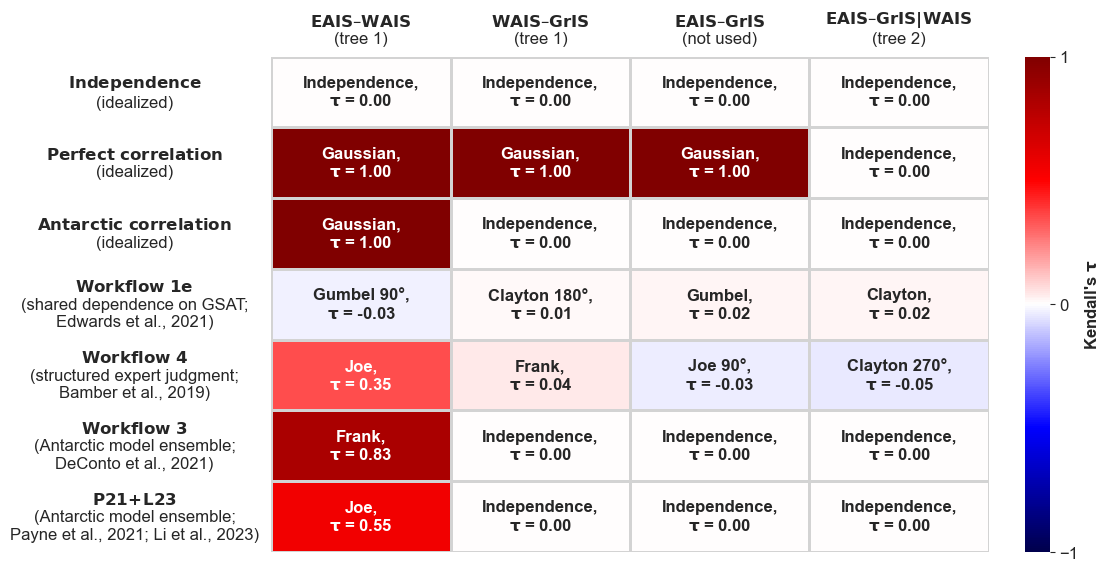

In [19]:
%%time
fig, axs = d23b.fig_dependence_table()

CPU times: user 10.5 s, sys: 54.2 ms, total: 10.6 s
Wall time: 11.1 s


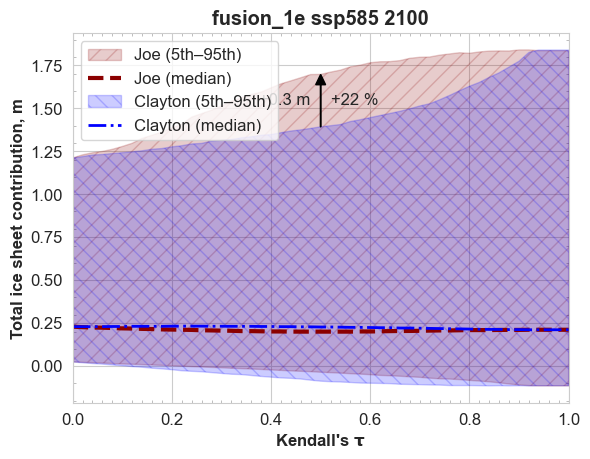

In [20]:
%%time
ax = d23b.ax_total_vs_tau()

CPU times: user 5.33 s, sys: 33.8 ms, total: 5.36 s
Wall time: 5.87 s


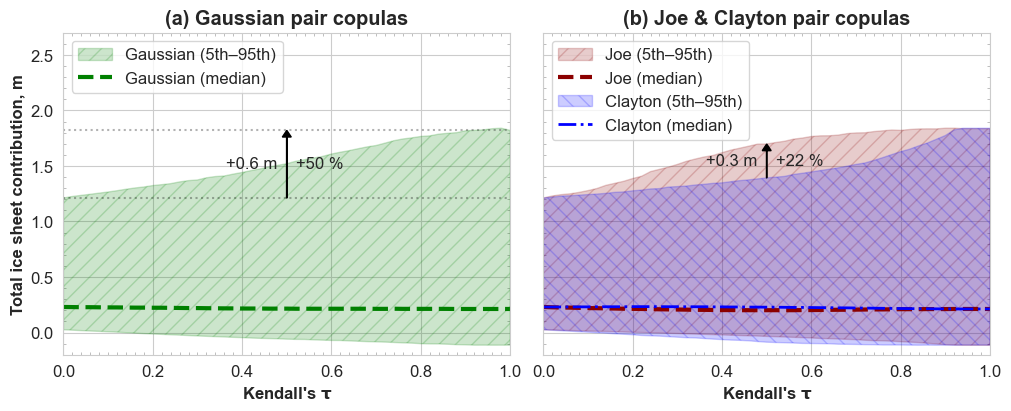

In [21]:
%%time
figs, axs = d23b.fig_total_vs_tau()

read_ar6_samples(wf_1e, WAIS, ssp585, 2020): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2030): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2040): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2050): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2060): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2070): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2080): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2090): including PEN in WAIS
('wf_3e', '0'), 95th: 1.4 - 1.2 = 0.1 m (+12 %)
('wf_3e', '0'), 50th: 0.2 - 0.2 = -0.0 m (-3 %)
CPU times: user 8.56 s, sys: 683 ms, total: 9.24 s
Wall time: 9.29 s


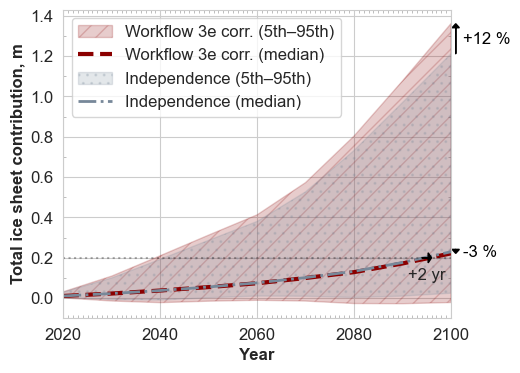

In [22]:
%%time
ax = d23b.ax_total_vs_time()

('1', '0'), 95th: 1.8 - 1.2 = 0.6 m (+50 %)
('1', '0'), 50th: 0.2 - 0.2 = -0.0 m (-8 %)
('10', '0'), 95th: 1.4 - 1.2 = 0.2 m (+12 %)
('10', '0'), 50th: 0.2 - 0.2 = -0.0 m (-4 %)
('01', '0'), 95th: 1.5 - 1.2 = 0.3 m (+26 %)
('01', '0'), 50th: 0.2 - 0.2 = -0.0 m (-4 %)
('1', '0'), 95th: 1.8 - 1.2 = 0.6 m (+50 %)
('1', '0'), 50th: 0.2 - 0.2 = -0.0 m (-8 %)
('10', '0'), 95th: 1.4 - 1.2 = 0.2 m (+12 %)
('10', '0'), 50th: 0.2 - 0.2 = -0.0 m (-4 %)
('wf_1e', '0'), 95th: 1.2 - 1.2 = 0.0 m (+0.4 %)
('wf_1e', '0'), 50th: 0.2 - 0.2 = -0.0 m (-0.0 %)
('wf_4', '10'), 95th: 1.3 - 1.4 = -0.1 m (-4 %)
('wf_4', '10'), 50th: 0.2 - 0.2 = -0.0 m (-0.9 %)
('wf_3e', '10'), 95th: 1.4 - 1.4 = -0.0 m (-0.0 %)
('wf_3e', '10'), 50th: 0.2 - 0.2 = 0.0 m (+0.5 %)
('P21+L23', '10'), 95th: 1.3 - 1.4 = -0.0 m (-2 %)
('P21+L23', '10'), 50th: 0.2 - 0.2 = -0.0 m (-0.9 %)
CPU times: user 5.51 s, sys: 52.4 ms, total: 5.56 s
Wall time: 5.94 s


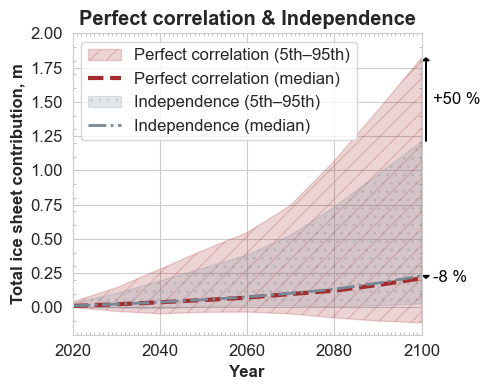

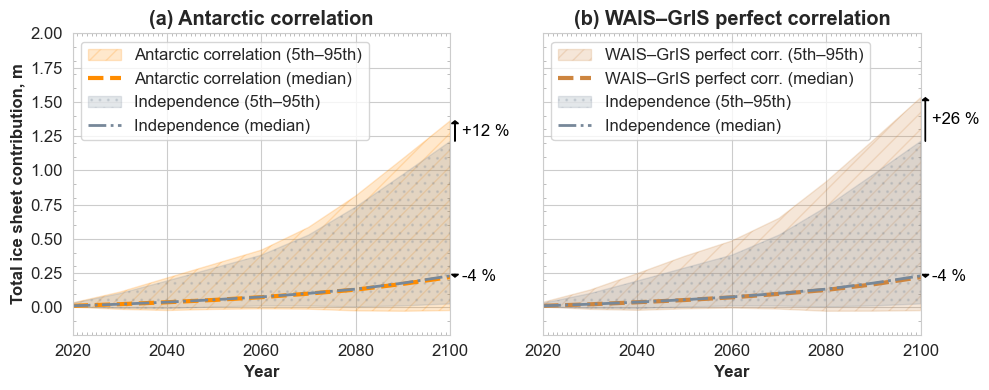

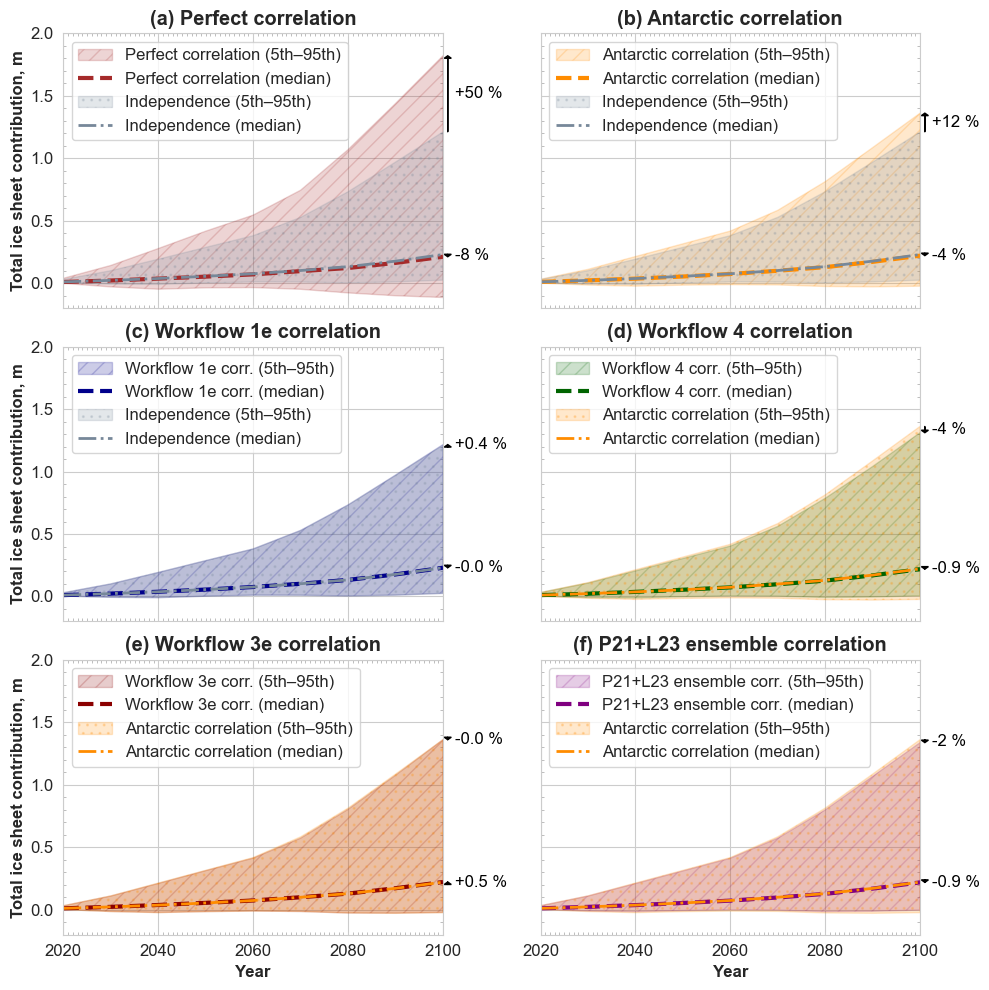

In [23]:
%%time
fig, axs = d23b.fig_total_vs_time(cop_workflows=('1',))
fig, axs = d23b.fig_total_vs_time(cop_workflows=('10', '01'))
fig, axs = d23b.fig_total_vs_time()

CPU times: user 225 ms, sys: 4.82 ms, total: 230 ms
Wall time: 230 ms


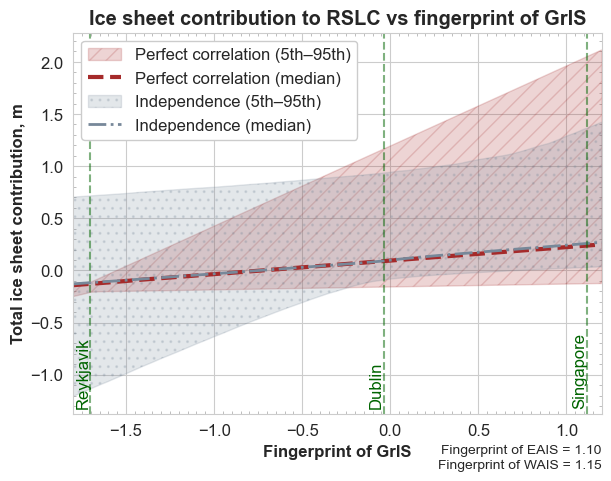

In [24]:
%%time
ax = d23b.ax_sum_vs_gris_fingerprint()

In [25]:
%%time
_ = d23b.name_save_fig(fig, fso='o')

Written o01.pdf (0.06 MB)
Written o01.png (0.90 MB)
CPU times: user 2.02 s, sys: 50.7 ms, total: 2.07 s
Wall time: 2.11 s


## Timing info

In [26]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2024-07-19 13:57:46
End:       2024-07-19 13:59:28
Wall time: 101 s
